In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import Polynomial

In [3]:
df = pd.read_csv("wurf.csv", sep=";", index_col = 0)
df

,Höhe h
Entfernung d,
0.000000,-0.293902
0.194944,-0.329494
0.389888,-0.358410
0.584831,0.626442
0.779775,1.611595
...,...
16.570225,0.589805
16.765169,0.977007
16.960112,0.132633


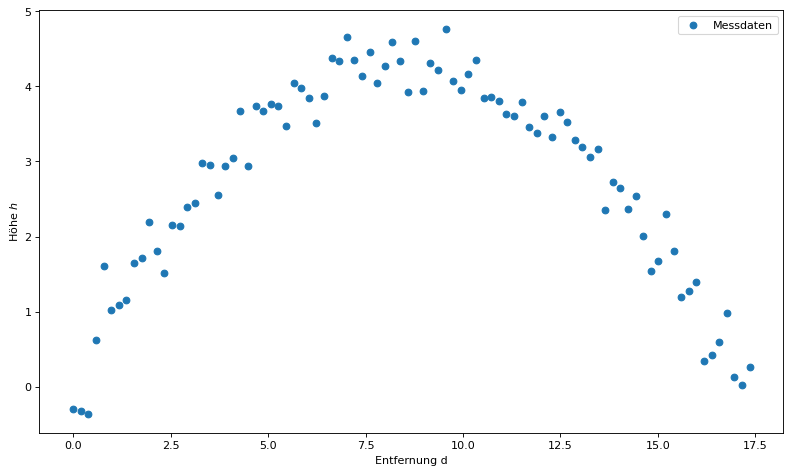

In [4]:
xdata = np.array(df.index)
ydata = np.array(df["Höhe h"])

fig = plt.figure(dpi = 80, figsize = (12, 7))
plt.scatter(xdata, ydata, label = "Messdaten")
plt.xlabel(r"Entfernung d")
plt.ylabel(r"Höhe $h$")
plt.legend()
plt.show()

In [5]:
# Für Polynome hat NumPy eine eigene fit Funktion, die sogar eine Callable Objekt zurückgibt
# Convert ist wichtig, da die fit Funktion die Koeffizienten in Linearfaktorzerlegung angibt, nicht in den normalen Basispolynomen
# vgl hierfür die Dokumentation: https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit
f = Polynomial.fit(xdata, ydata, deg = 2).convert()

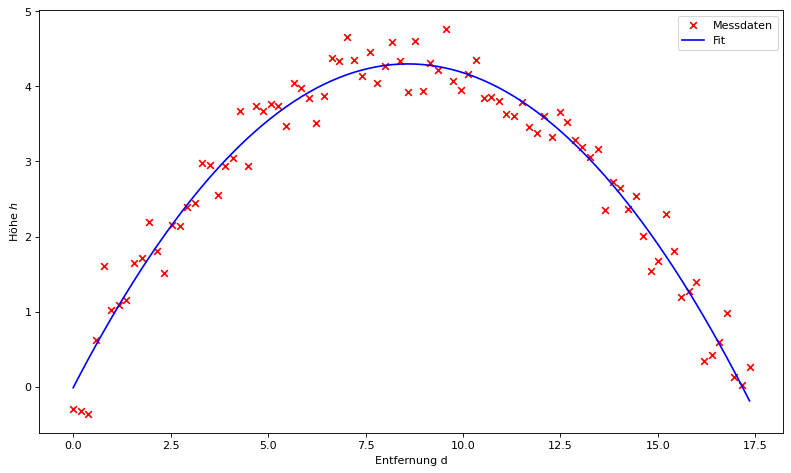

In [6]:
fig = plt.figure(dpi = 80, figsize = (12, 7))
plt.scatter(xdata, ydata, marker = "x", c = "r", label = "Messdaten")
plt.plot(xdata, f(xdata), c = "b", label = "Fit")
plt.xlabel(r"Entfernung d")
plt.ylabel(r"Höhe $h$")
plt.legend()
plt.show()

In [7]:
# Zur Bestimmung der Parameter führen wir einen Koeffizientenvergleich durch mit der Allgemeinen Formel: vgl. https://de.wikipedia.org/wiki/Wurfparabel
coefs = f.coef

# Es gilt: \tan(\beta) = coefs[1] (also der lineare Teil des Polynoms)
beta = np.arctan(coefs[1])
print(f"Der Abwurfwinkel Beträgt {np.degrees(beta):.2f}°")

Der Abwurfwinkel Beträgt 45.13°


In [8]:
# Auch hier vgl Wikipedia
v_0 = np.sqrt(-9.81/(2*coefs[2]*np.cos(beta)**2))
print(f"Die Abwurfgeschwindigkeit beträgt: {v_0:.2f}km/h")

Die Abwurfgeschwindigkeit beträgt: 12.98km/h


In [9]:
# Berechne die Koordinaten des Scheitelpunktes:
f_prime = f.deriv()

# Suche Nullstellen:
roots = f_prime.roots()

root = roots[0]
y_coord = f(root)

print(f"Der Scheitelpunkt ist bei ({root:.2f}, {y_coord:.2f})")

Der Scheitelpunkt ist bei (8.59, 4.30)


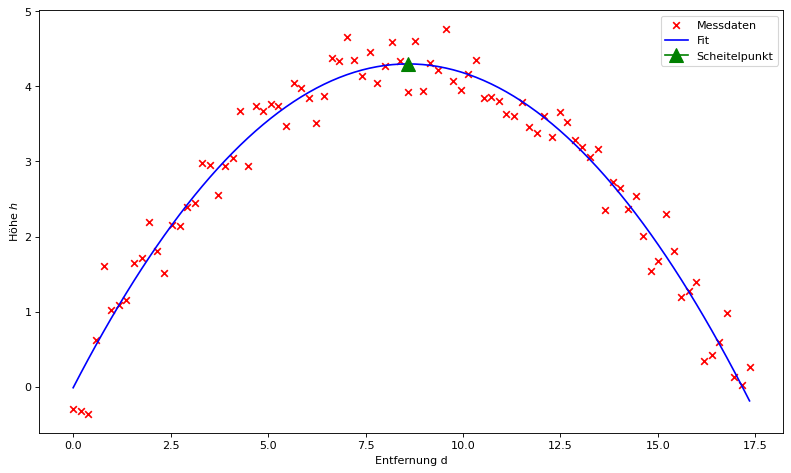

In [25]:
fig = plt.figure(dpi = 80, figsize = (12, 7))
plt.scatter(xdata, ydata, marker = "x", c = "r", label = "Messdaten")
plt.plot(xdata, f(xdata), c = "b", label = "Fit")
plt.plot(root, y_coord, marker = "^", c = "g", markersize = 13, label = "Scheitelpunkt")
plt.xlabel(r"Entfernung d")
plt.ylabel(r"Höhe $h$")
plt.legend()
plt.show()